In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN

Using TensorFlow backend.


In [2]:
os.getcwd()
#os.chdir('/Users/maneeshagvs/Documents/datasets


'/Users/maneeshagvs/Documents/datasets'

In [3]:
df  = pd.read_csv('days.csv')

df.shape # 731 observations and 16 variables

(731, 16)

In [558]:
df = df.drop(['instant'], axis=1)

In [559]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01/01/11,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02/01/11,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03/01/11,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04/01/11,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05/01/11,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:

cnames = ['temp','atemp','hum','windspeed','casual','registered']

##Correlation analysis
#Correlation plot
df_corr = df.loc[:,cnames]

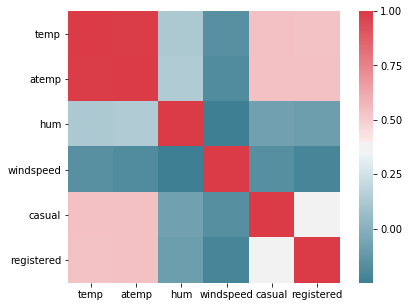

In [7]:
corr = df_corr.corr() # correlation matrix
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [563]:
#from the above heatmap it is clear that temp and atemp are highly correlated with each other

df = df.drop(columns = 'atemp')


(array([  7.,  27.,  53.,  57.,  37.,  65.,  95., 101.,  78.,  51.,  48.,
         64.,  38.,  10.]),
 array([  22.        ,  642.85714286, 1263.71428571, 1884.57142857,
        2505.42857143, 3126.28571429, 3747.14285714, 4368.        ,
        4988.85714286, 5609.71428571, 6230.57142857, 6851.42857143,
        7472.28571429, 8093.14285714, 8714.        ]),
 <a list of 14 Patch objects>)

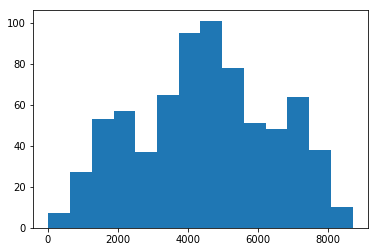

In [565]:
#Normality check
%matplotlib inline  
plt.hist(df['cnt'], bins='auto')

# the histagram below indicates that the data is normally distributed so far

{'boxes': [<matplotlib.lines.Line2D at 0x1a397118d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a3971d190>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a3971dd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a3971d990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a38fabf50>,
  <matplotlib.lines.Line2D at 0x1a39711d50>]}

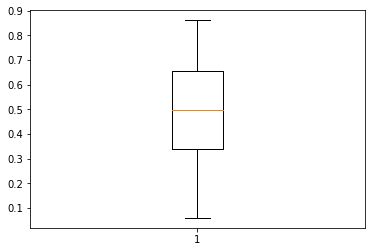

In [566]:
#outlier analysis

cnames = ['temp','hum','windspeed','casual','registered']
%matplotlib inline  
plt.boxplot(df['temp'])
#the temp has not outliers


{'boxes': [<matplotlib.lines.Line2D at 0x1a397e6390>],
 'caps': [<matplotlib.lines.Line2D at 0x1a397e6c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a397f4850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a397f4450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a37bf9090>,
  <matplotlib.lines.Line2D at 0x1a397e6810>]}

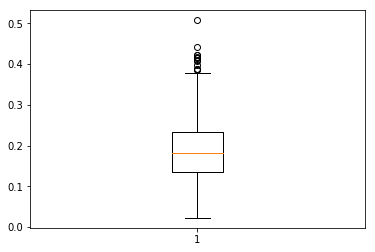

In [567]:
plt.boxplot(df['windspeed'])

{'boxes': [<matplotlib.lines.Line2D at 0x1a3984de10>],
 'caps': [<matplotlib.lines.Line2D at 0x1a398596d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a398c1310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a39859ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a3984ded0>,
  <matplotlib.lines.Line2D at 0x1a398592d0>]}

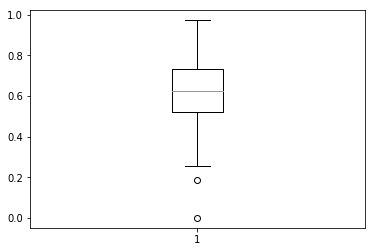

In [568]:
plt.boxplot(df['hum'])

{'boxes': [<matplotlib.lines.Line2D at 0x1a39976c50>],
 'caps': [<matplotlib.lines.Line2D at 0x1a39983510>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a3998e150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a39983d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a39976d10>,
  <matplotlib.lines.Line2D at 0x1a39983110>]}

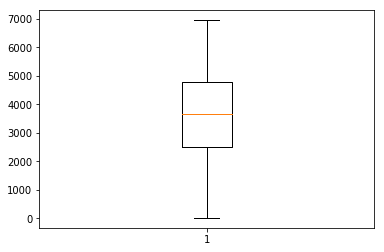

In [569]:
plt.boxplot(df['registered'])

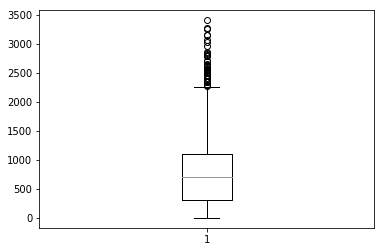

In [570]:
plt.boxplot(df['casual'])

df2 = df


In [8]:
#the outliers are present for hum, windspeed and casual
# #Extract quartiles


cnames = ['temp','hum','windspeed','casual','registered']

for i in cnames:
        df.loc[:,i] = df.loc[:,i].astype('float64')

In [9]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    loc = df.columns.get_loc(i)
    outlier_index= df[(df.loc[:,i] < min)|(df.loc[:,i] > max)].index
    
    for j in outlier_index:
        
        df.iloc[j,loc] = np.nan
        
#changed the outlier to null values
df.isnull().sum()





temp
hum
windspeed
casual
registered


instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64

In [10]:
#Impute with median
for i in cnames:
    df[i] = df[i].fillna(df[i].median())

In [633]:

import statsmodels.api as sm


for i in cnames:
        df.loc[:,i] = df.loc[:,i].astype('float')
         


In [634]:
# Train the model using the training sets
#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)

In [635]:

model = sm.OLS(train.iloc[:,13].astype('float'),train.iloc[:,2:13].astype('float')).fit()

In [636]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.016e+04
Date:                Thu, 16 May 2019   Prob (F-statistic):               0.00
Time:                        09:59:57   Log-Likelihood:                -4246.4
No. Observations:                 584   AIC:                             8515.
Df Residuals:                     573   BIC:                             8563.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr            44.3546     46.115      0.962      0.337     -46.220     134.929
mnth          -8.8442      4.968     -1.780      0.076     -18.603       0.914
holiday     -179.6167     96.104     -1.869      0.062    -368.376       9.142
weekday       25.8135      7.329      3.522      0.000      11.418      40.209
workingday  -787.4980     45.945    -17.140      0.000    -877.740    -697.256
weathersit   -52.5049     38.510     -1.363      0.173    -128.143      23.133
temp        1080.7641    125.877      8.586      0.000     833.527    1328.002
hum          197.2324    120.566      1.636      0.102     -39.573     434.037
windspeed    191.5979    176.342      1.087      0.278    -154.757     537.953
casual         0.3262      0.045      7.217      0.000       0.237       0.415
registered     1.1317      0.021     53.577      0.000       1.090       1.173
==============================================================================
Omnibus:                      239.886   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1111.086
Skew:                           1.821   Prob(JB):                    5.38e-242
Kurtosis:                       8.692   Cond. No.                     4.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [637]:
# make the predictions by the model

predictions_LR = model.predict(test.iloc[:,2:13].astype('float')) 

In [638]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,13], predictions_LR)

7.696548567029869